In [29]:
 # Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [30]:
import sys
sys.path.append('/home/ubuntu/fastai/')
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from glob2 import glob
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [21]:
train_new = pd.DataFrame(columns=["file", "species"])

for image in glob("/home/ubuntu/plants/Image-processing/train_new/train/**/*.tiff"):
    dir_name = image.split('/')
    file_name, species = dir_name[-1], dir_name[-2]

    train_new = train_new.append({
        "file": file_name,
        "species": species
        }, ignore_index=True)
train_new.species.replace(' ','_',regex=True,inplace =True)
train_new.to_csv('new_labels.csv', index=False)

In [24]:
! cat new_labels.csv | head

file,species
20151012_160047_1.tiff,Common_wheat
DJI_0004_8.tiff,Common_wheat
20151012_154730_3.tiff,Common_wheat
WP_20150526_17_01_32_Pro_3.tiff,Common_wheat
DSC_0768_4.tiff,Common_wheat
DJI_0004_4.tiff,Common_wheat
DSC_0766_5.tiff,Common_wheat
Image 2836 55.756520 9.739194 _3.tiff,Common_wheat
20151012_154730_0.tiff,Common_wheat


In [50]:
files = !ls /home/ubuntu/plants/Image-processing/train

In [51]:
filestest = !ls /home/ubuntu/plants/Image-processing/test/

In [52]:
x = []
y = []
for i, image in enumerate(filestest):
    img = plt.imread('/home/ubuntu/plants/Image-processing/test/'+image)
    x.append(img.shape[0])
    y.append(img.shape[1])

(array([ 98.,  86.,  84.,  89.,  73.,  74.,  83.,  76.,  65.,  66.]),
 array([ 200. ,  214.9,  229.8,  244.7,  259.6,  274.5,  289.4,  304.3,  319.2,  334.1,  349. ]),
 <a list of 10 Patch objects>)

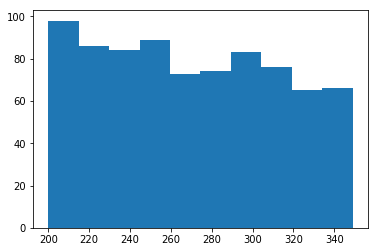

In [53]:
plt.hist(x)

(array([  804.,  1172.,   423.,   261.,   344.,   385.,   344.,   242.,   194.,   159.,   105.,    66.,    59.,
           48.,    56.,    35.,    27.,    28.,    19.,    13.,    15.,     7.,     5.,     5.,     4.,     2.,
            1.,     5.,     0.,     5.,     1.,     1.,     1.,     0.,     0.,     1.,     1.,     0.,     1.,
            0.,     0.,     0.,     0.,     0.,     0.,     1.,     0.,     0.,     0.,     2.]),
 array([   49.  ,   117.16,   185.32,   253.48,   321.64,   389.8 ,   457.96,   526.12,   594.28,   662.44,
          730.6 ,   798.76,   866.92,   935.08,  1003.24,  1071.4 ,  1139.56,  1207.72,  1275.88,  1344.04,
         1412.2 ,  1480.36,  1548.52,  1616.68,  1684.84,  1753.  ,  1821.16,  1889.32,  1957.48,  2025.64,
         2093.8 ,  2161.96,  2230.12,  2298.28,  2366.44,  2434.6 ,  2502.76,  2570.92,  2639.08,  2707.24,
         2775.4 ,  2843.56,  2911.72,  2979.88,  3048.04,  3116.2 ,  3184.36,  3252.52,  3320.68,  3388.84,
         3457.  ]),
 <a li

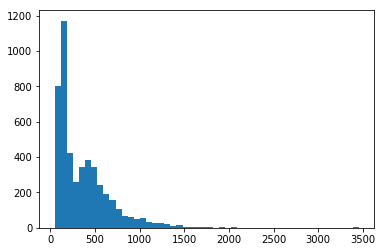

In [54]:
x = []
for i, image in enumerate(files):
    img = plt.imread('/home/ubuntu/plants/Image-processing/train/'+image)
    x.append(img.shape[0])
plt.hist(x,bins=50,ran)

(array([   0.,    0.,   36.,  174.,  285.,  346.,  353.,  376.,  332.,  237.,   98.,  104.,   79.,   77.,
          83.,   74.,   59.,   80.,  154.,  116.,  121.,  109.,  106.,  115.,  111.,   77.,   90.,   65.,
          71.,   62.,   59.,   61.,   53.,   57.,   46.,   39.,   45.,   35.,   26.,   23.,   17.,   22.,
          20.,   17.,   18.,   16.,   17.,   16.,   14.,   15.]),
 array([    0.,    20.,    40.,    60.,    80.,   100.,   120.,   140.,   160.,   180.,   200.,   220.,   240.,
          260.,   280.,   300.,   320.,   340.,   360.,   380.,   400.,   420.,   440.,   460.,   480.,   500.,
          520.,   540.,   560.,   580.,   600.,   620.,   640.,   660.,   680.,   700.,   720.,   740.,   760.,
          780.,   800.,   820.,   840.,   860.,   880.,   900.,   920.,   940.,   960.,   980.,  1000.]),
 <a list of 50 Patch objects>)

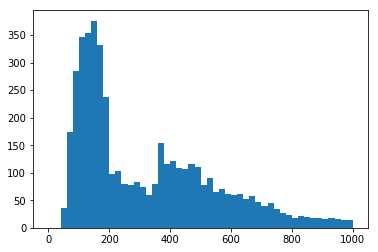

In [55]:

plt.hist(x,bins=50,range=[0,1000])


(731, 731, 3)
(123, 123, 3)
(361, 361, 3)
(337, 337, 3)
(63, 63, 3)
(83, 83, 3)
(71, 71, 3)
(103, 103, 3)
(121, 121, 3)
(149, 149, 3)


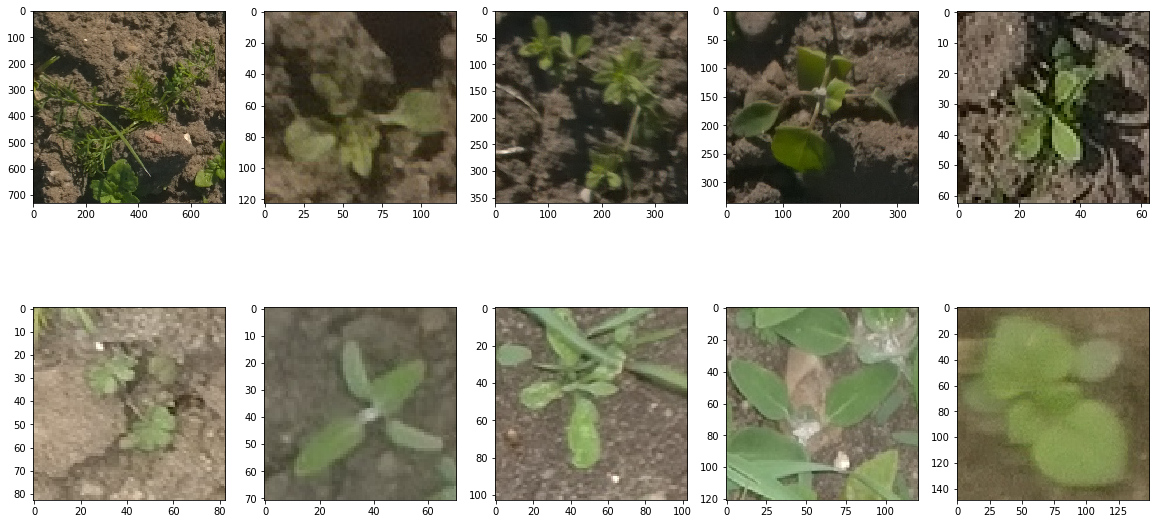

In [49]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(files):
    plt.subplot(2, columns, i + 1)
    img = plt.imread('/home/ubuntu/plants/Image-processing/train/'+image)
    plt.imshow(img)
    print(img.shape)

In [38]:
f_model = resnet50
PATH = '/home/ubuntu/plants/Image-processing/'
label_csv ='labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [39]:
def f1(preds, targs):
    preds = np.argmax(preds, 1)
    return f1_score(targs, preds, average='micro')

In [40]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train', label_csv, tfms=tfms,
                    val_idxs=val_idxs, test_name='test')

In [41]:
data = get_data(64)

In [42]:
learn = ConvLearner.pretrained(f_model,data, ps=0.5,metrics=[f1],precompute= True)

100%|██████████| 16/16 [00:03<00:00,  4.01it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 68%|██████▊   | 41/60 [00:01<00:00, 38.20it/s, loss=21.3]


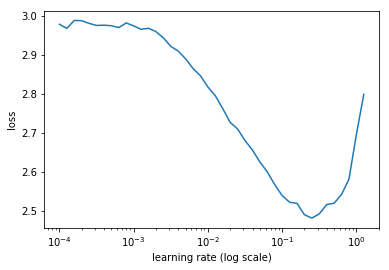

In [16]:
learn.lr_find()
learn.sched.plot()

In [17]:
lr =1e-2
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       1.9727   1.52065  0.50806]                     
[ 1.       1.58802  1.25381  0.5951 ]                     
[ 2.       1.35959  1.20498  0.6059 ]                     
[ 3.       1.27681  1.13257  0.62789]                     
[ 4.       1.16246  1.10723  0.61833]                     
[ 5.       1.09254  1.07192  0.62523]                     
[ 6.       1.02788  1.07329  0.62523]                     



In [24]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz,aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train', label_csv, tfms=tfms,
                    val_idxs=val_idxs, test_name='test')

In [25]:
data = get_data(64)

In [26]:
learn.precompute=False

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 92%|█████████▏| 55/60 [00:14<00:01,  3.72it/s, loss=4.9] 

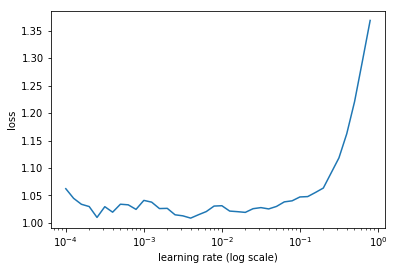

 92%|█████████▏| 55/60 [00:30<00:02,  1.83it/s, loss=4.9]

In [27]:
learn.lr_find()
learn.sched.plot()

In [28]:
learn.fit(1e-2, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))


 33%|███▎      | 20/60 [00:06<00:12,  3.25it/s, loss=1.1] 
                                                         
 38%|███▊      | 23/60 [00:07<00:11,  3.17it/s, loss=1.1]

Exception in thread Thread-19:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-18:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeErro

[ 0.       1.08287  1.06797  0.6294 ]                     
[ 1.       1.04334  1.04048  0.64066]                     
[ 2.       1.03243  1.02645  0.63441]                     



In [29]:
lrs =np.array([lr/18,lr/6,lr/2])
learn.unfreeze()
learn.fit(lrs,n_cycle=3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       1.34499  0.92673  0.67191]                     
[ 1.       0.82419  0.53448  0.80972]                      
[ 2.       0.4956   0.50121  0.82515]                      
[ 3.       0.3477   0.45038  0.83387]                      
[ 4.       0.23717  0.41528  0.85158]                      
[ 5.       0.16312  0.39688  0.86096]                      
[ 6.       0.11842  0.39084  0.86011]                      



In [30]:
sz = 128
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.82444  0.55231  0.80583]                      
[ 1.       0.72232  0.47671  0.83303]                      
[ 2.       0.65732  0.46384  0.84136]                      
[ 3.       0.63085  0.43782  0.84533]                      
[ 4.       0.58727  0.42563  0.84865]                      
[ 5.       0.56335  0.41211  0.85698]                      
[ 6.       0.53765  0.41018  0.85177]                      



In [31]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.41044  0.28459  0.90444]                      
[ 1.       0.32006  0.24187  0.91778]                      
[ 2.       0.26582  0.23557  0.91069]                      
[ 3.       0.24346  0.20305  0.92546]                      
[ 4.       0.19251  0.17814  0.94024]                      
[ 5.       0.17308  0.17569  0.93796]                      
[ 6.       0.15712  0.16983  0.94128]                      



In [17]:
learn.load('128')

In [ ]:
lr =1e-2
lrs =np.array([lr/18,lr/6,lr/2])

In [32]:
sz = 256
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.29069  0.31437  0.88673]                      
[ 1.       0.26909  0.27748  0.89923]                      
[ 2.       0.24428  0.2845   0.89819]                      
[ 3.       0.23821  0.27376  0.89819]                      
[ 4.       0.22445  0.26417  0.89942]                      
[ 5.       0.21984  0.25728  0.90671]                      
[ 6.       0.21108  0.25371  0.90984]                      



In [33]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.21388  0.22962  0.92234]                      
[ 1.       0.17146  0.19009  0.93002]                      
[ 2.       0.14128  0.17657  0.93607]                      
[ 3.       0.13882  0.1384   0.95189]                      
[ 4.       0.10973  0.15872  0.94356]                      
[ 5.       0.09483  0.12498  0.96231]                       
[ 6.       0.08227  0.11471  0.96127]                       



HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 65%|██████▌   | 39/60 [01:31<00:49,  2.35s/it, loss=0.277] 

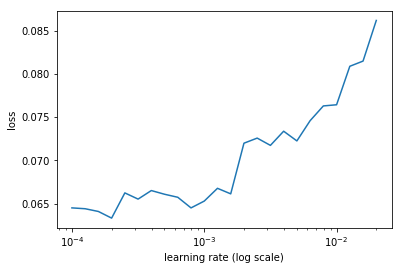

In [36]:
learn.lr_find()
learn.sched.plot()

In [ ]:
learn.save(f'{sz}')

In [ ]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [ ]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [ ]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [ ]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [ ]:
learn.load('256')

In [47]:
pred,y = learn.TTA()

In [48]:
preds = np.mean(np.exp(pred),0)

In [46]:
preds.shape

(5, 950, 12)

In [38]:
y.shape

(950,)

In [50]:
f1(preds,y)

0.97578947368421054

In [52]:
submission, test_y = learn.TTA(is_test=True)

In [53]:
submission = np.mean(np.exp(submission),0)
submission = np.argmax(submission,axis=1)

In [57]:
func = np.vectorize(lambda x:data.classes[x])
species = func(submission)

In [58]:
test_df = [f.split('/')[1] for f in data.test_dl.dataset.fnames]
test_df[:5]

['12625488b.png',
 'c832e4302.png',
 'e82017baa.png',
 'c10ccbd82.png',
 '8b27bfd2b.png']

In [59]:
len(species) == len(test_df)

True

In [60]:
submission_df = pd.DataFrame({'file': test_df, 'species': species})
submission_df.species.replace('_',' ',regex=True,inplace =True)
submission_df.to_csv('submission.csv.gz', compression = 'gzip',index=False)

In [34]:
data.classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common_Chickweed',
 'Common_wheat',
 'Fat_Hen',
 'Loose_Silky-bent',
 'Maize',
 'Scentless_Mayweed',
 'Shepherds_Purse',
 'Small-flowered_Cranesbill',
 'Sugar_beet']

In [37]:
learn